### Cosine Distance

<div style="font-size:20px">
The Cosine distance is based on the angle between two vectors,  
not their absolute positions or lengths.  
It measures similarity in orientation:  
    
- 1 → vectors are identical in direction
  
- 0 → vectors are orthogonal (90° apart)
  
- -1 → vectors point in opposite directions
</div>

<div style="font-size:22px; margin-top:15px">
$\text{cosine similarity}(A,B) = \frac{A \cdot B}{||A|| \, ||B||}$

$\text{cosine distance}(A,B) = 1 - \text{cosine similarity}(A,B)$
</div>


,Point,Cosine similarity,Cosine distance
0,"(2, -1)",0.894427,0.105573
1,"(3, 0)",1.000000,0.000000
2,"(2, -2)",0.707107,0.292893
3,"(2, 3)",0.554700,0.445300
4,"(0, -1)",0.000000,1.000000


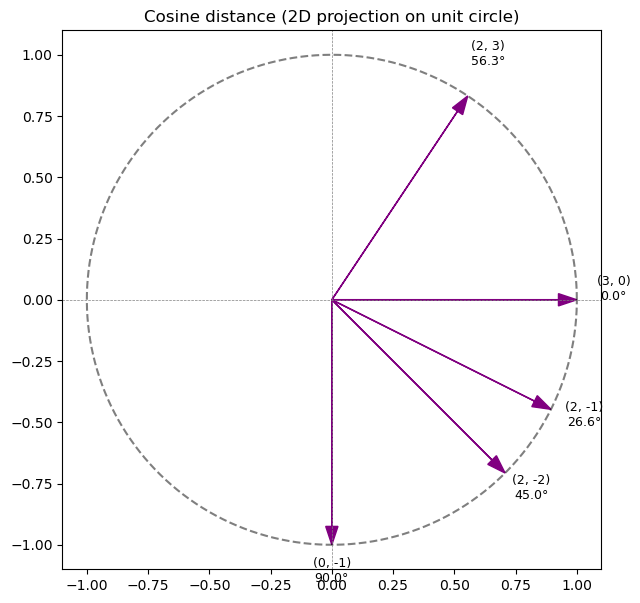

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def cosine_similarity(a, b):
    a, b = np.array(a), np.array(b)
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def cosine_distance(a, b):
    return 1 - cosine_similarity(a, b)

origin = np.array([1, 0])  
points = [(2, -1), (3, 0), (2, -2), (2, 3), (0, -1)]

distances = [(pnt, cosine_similarity(pnt, origin), cosine_distance(pnt, origin)) for pnt in points]
df = pd.DataFrame(distances, columns=["Point", "Cosine similarity", "Cosine distance"])
display(df)

theta = np.linspace(0, 2*np.pi, 400)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

plt.figure(figsize=(7, 7))
plt.plot(circle_x, circle_y, 'k--', alpha=0.5)

for (px, py) in points:
    vec = np.array([px, py])
    vec_norm = vec / np.linalg.norm(vec)
    plt.arrow(0, 0, vec_norm[0], vec_norm[1],
              head_width=0.05, length_includes_head=True, color="purple")
    angle = np.degrees(np.arccos(cosine_similarity(vec, origin)))
    plt.text(vec_norm[0]*1.15, vec_norm[1]*1.15, f"{(px,py)}\n{angle:.1f}°", 
             ha="center", fontsize=9, color="black")

plt.axhline(0, color="grey", linestyle="--", linewidth=0.5)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.5)
plt.gca().set_aspect("equal", adjustable="box")
plt.title("Cosine distance (2D projection on unit circle)")
plt.show()
